In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.multiclass import OneVsRestClassifier

In [2]:
data = pd.read_excel("C:/Users/Donát/Documents/GitHub/-nkutfel/2019/2019_merged_matekA1A2_cleaned.xlsx")

In [3]:
#szűrjük ki a nem kategorikus vagy numerikus változókat
working_data = data.drop(labels = ["Name", "Neptun", "Tankör"], axis = 1)

#alakítsuk numerikussá a %-os teljesítménymutatókat
for i, row in working_data.iterrows():
    working_data.at[i, "Matek eredmény"] = float(row["Matek eredmény"][:-3] + "." + row["Matek eredmény"][-2])
    working_data.at[i, "Kognitív eredmény"] = float(row["Kognitív eredmény"][:-3] + "." + row["Kognitív eredmény"][-2])
    working_data.at[i, "Kognitív pont"] = float(str(row["Kognitív pont"]).replace(",", "."))
    working_data.at[i, "Össz eredmény (átlag)"] = float(row["Össz eredmény (átlag)"][:-3] + "." + row["Össz eredmény (átlag)"][-2])



In [4]:

features = working_data.drop(labels = ["Matematika A1a - Analízis", "Matematika A2c", "Szak", "Matek helyes", "Összes pont", "Össz eredmény (átlag)"], axis = 1)
label = working_data["Matematika A1a - Analízis"]
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=0)

In [5]:
#SVM-re
from sklearn.svm import SVC
clf = OneVsRestClassifier(SVC(C = 0.6, class_weight = "balanced", random_state=0)).fit(X_train, y_train)     # balanced nélkül romlik a pontosság
y_pred = clf.predict(X_test)

print(f'Accuracy: {round(sklearn.metrics.accuracy_score(y_test, y_pred),2)}')
print(f'Precision: {round(sklearn.metrics.precision_score(y_test, y_pred, average = "macro"),2)}')
print(f'Recall: {round(sklearn.metrics.recall_score(y_test, y_pred, average = "macro"),2)}')

Accuracy: 0.33
Precision: 0.22
Recall: 0.3


D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
#tesztelés megfelelő C-hez
scores_svm = []
for i in range(1,50):
    clf = OneVsRestClassifier(SVC(C = i*0.1, class_weight = "balanced", random_state=0)).fit(X_train, y_train)    
    y_pred = clf.predict(X_test)
    scores_svm.append(round(sklearn.metrics.accuracy_score(y_test, y_pred),2))
scores_svm

[0.29,
 0.3,
 0.26,
 0.38,
 0.36,
 0.33,
 0.33,
 0.36,
 0.38,
 0.38,
 0.39,
 0.39,
 0.38,
 0.39,
 0.38,
 0.33,
 0.32,
 0.29,
 0.26,
 0.26,
 0.25,
 0.25,
 0.28,
 0.26,
 0.26,
 0.28,
 0.3,
 0.3,
 0.29,
 0.29,
 0.28,
 0.28,
 0.28,
 0.28,
 0.28,
 0.28,
 0.28,
 0.28,
 0.28,
 0.28,
 0.28,
 0.28,
 0.28,
 0.28,
 0.28,
 0.28,
 0.28,
 0.28,
 0.28]

In [7]:
#keresztvalidációval
from sklearn.model_selection import cross_val_score

data_of_regural = pd.DataFrame({"Regularization":[], "Acc": []})
svm_dict = {}
for i in range(1,50):
    clf = OneVsRestClassifier(SVC(C = i*0.1, class_weight = "balanced", random_state=0))
    scores_svm = cross_val_score(clf, X_train, y_train, scoring = "accuracy", cv=10)
    for element in scores_svm:
        data_of_regural = data_of_regural.append({"Regularization":i, "Acc": element}, ignore_index=True)
    svm_dict[scores_svm.mean()] = i/10
print("Optimal value for C:",svm_dict[max(list(svm_dict.keys()))])

D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\ot

D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\ot

Optimal value for C: 0.6


In [8]:
#logisztikus regresszióra
from sklearn.linear_model import LogisticRegression

logreg = OneVsRestClassifier(LogisticRegression(class_weight = "balanced", random_state=0, max_iter = 1000)).fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(f'Accuracy: {round(sklearn.metrics.accuracy_score(y_test, y_pred),2)}')
print(f'Precision: {round(sklearn.metrics.precision_score(y_test, y_pred, average = "macro"),2)}')
print(f'Recall: {round(sklearn.metrics.recall_score(y_test, y_pred, average = "macro"),2)}')

Accuracy: 0.32
Precision: 0.23
Recall: 0.23


In [9]:
#ezek után nem oneVSall: lineáris regresszió
from sklearn.linear_model import LinearRegression

reg_alap = LinearRegression().fit(features,label)
reg_alap.score(features, label)         

0.3782657484091665

In [10]:
#most nézzük a tanítóhalmazon és a teszthalmazon

reg = LinearRegression().fit(X_train,y_train)
reg_pred = reg.predict(X_test)

#együtthatók
print("Coefficients:", reg.coef_)
#RMSE

rmse = np.power(np.sum(np.power(y_test - reg_pred, 2))/reg_pred.shape[0],0.5)
print("RMSE:", rmse)

Coefficients: [-4.24077488e-02  4.85476232e-01  2.53319541e+01  2.51839628e+01
  2.53089597e+01 -3.51768944e+00  2.50631956e+00 -1.66157322e+00
  1.05149420e-02  3.59530563e-03  1.10219115e-02 -6.82496003e-04]
RMSE: 0.9775153179536493


<function matplotlib.pyplot.show(close=None, block=None)>

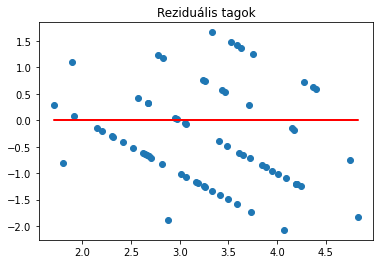

In [11]:
#Nézzük meg a reziduális tagokat

import matplotlib.pyplot as plt

plt.scatter(reg_pred, y_test-reg_pred)
plt.plot(reg_pred, [0 for i in range(reg_pred.shape[0])], c="red") #0-vonal
plt.title("Reziduális tagok")
plt.axis
plt.show

In [12]:
#R^2 és SSR
SST = np.sum(np.power(y_test-np.mean(y_test),2))
SSR = np.sum(np.power(reg_pred-np.mean(y_test),2))
R2 = SSR/SST
R2

0.5850937867059999

In [13]:
#másik: kerekítsük a becsült értékeket

for i in range(reg_pred.shape[0]):
    reg_pred[i] = round(reg_pred[i],0)

rmse = np.power(np.sum(np.power(y_test - reg_pred, 2))/reg_pred.shape[0],0.5)
print("RMSE:", rmse)
print(round(sklearn.metrics.accuracy_score(y_test, reg_pred),2))

RMSE: 0.9927271762054324
0.28


In [14]:
#főkomponens analízissel
#nézzük, mennyi főkomponenssel lesz a legjobb. (pl a logisztikus regresszió)
from sklearn.decomposition import PCA

scores = []

for i in range(1,9):
    projected = PCA(i).fit_transform(features)
    X_train, X_test, y_train, y_test = train_test_split(projected, label, test_size=0.3, random_state=0)
    logreg = OneVsRestClassifier(LogisticRegression(random_state=0, max_iter = 10000)).fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    scores.append(round(sklearn.metrics.accuracy_score(y_test, y_pred),2))
    
scores

[0.38, 0.32, 0.35, 0.32, 0.35, 0.33, 0.32, 0.33]

In [15]:
#főkomponenses logreg
from sklearn.decomposition import PCA
projected = PCA(3).fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(projected, label, test_size=0.3, random_state=0)

logreg = OneVsRestClassifier(LogisticRegression(class_weight = "balanced", random_state=0, max_iter = 10000)).fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(f'Accuracy: {round(sklearn.metrics.accuracy_score(y_test, y_pred),2)}')
print(f'Precision: {round(sklearn.metrics.precision_score(y_test, y_pred, average = "macro"),2)}')
print(f'Recall: {round(sklearn.metrics.recall_score(y_test, y_pred, average = "macro"),2)}')

Accuracy: 0.35
Precision: 0.33
Recall: 0.43


In [16]:
#nézzük meg, hogy főkompononensenként hogy változnak a különböző algoritmusok eredménymutatói, és rakjuk dataframe-be!
PCA_scores = pd.DataFrame({"Főkomponensek száma":[], "Logreg Acc.":[], "SVM Acc.":[], "Linreg RMSE":[], "Linreg R2":[], 
                           "Linreg RMSE kerekített":[], "Linreg Acc kerekített":[]})


for i in range(1,9):
    projected = PCA(i).fit_transform(features)
    X_train, X_test, y_train, y_test = train_test_split(projected, label, test_size=0.3, random_state=0)
    
    logreg = OneVsRestClassifier(LogisticRegression(class_weight = "balanced", random_state=0, max_iter = 10000)).fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    log_acc = round(sklearn.metrics.accuracy_score(y_test, y_pred),2)
    
    clf = OneVsRestClassifier(SVC(class_weight = "balanced", random_state=0)).fit(X_train, y_train)    
    y_pred = clf.predict(X_test)
    SVM_acc = round(sklearn.metrics.accuracy_score(y_test, y_pred),2)
    
    reg = LinearRegression().fit(X_train,y_train)
    reg_pred = reg.predict(X_test)
    rmse = round(np.power(np.sum(np.power(y_test - reg_pred, 2))/reg_pred.shape[0],0.5),2)
    SST = np.sum(np.power(y_test-np.mean(y_test),2))
    SSR = np.sum(np.power(reg_pred-np.mean(y_test),2))
    R2 = round(SSR/SST,2)
    
    for j in range(reg_pred.shape[0]):
        reg_pred[j] = round(reg_pred[j],0)
    rmse_rounded = round(np.power(np.sum(np.power(y_test - reg_pred, 2))/reg_pred.shape[0],0.5),2)
    reg_pred_rounded = round(sklearn.metrics.accuracy_score(y_test, reg_pred),2)
    
    #új sor a dataframe-be
    new_row = {"Főkomponensek száma":i, "Logreg Acc.":log_acc, "SVM Acc.":SVM_acc, "Linreg RMSE":rmse, "Linreg R2":R2, 
               "Linreg RMSE kerekített":rmse_rounded, "Linreg Acc kerekített":reg_pred_rounded}
    PCA_scores = PCA_scores.append(new_row, ignore_index=True)

In [17]:
PCA_scores

,Főkomponensek száma,Logreg Acc.,SVM Acc.,Linreg RMSE,Linreg R2,Linreg RMSE kerekített,Linreg Acc kerekített
0,1.0,0.38,0.30,0.98,0.54,1.02,0.26
1,2.0,0.28,0.33,0.98,0.54,1.02,0.26
2,3.0,0.35,0.35,0.95,0.55,0.97,0.28
3,4.0,0.32,0.29,0.96,0.55,0.96,0.30
4,5.0,0.30,0.30,0.96,0.55,0.96,0.30
5,6.0,0.28,0.26,0.96,0.55,1.01,0.29
6,7.0,0.28,0.26,0.96,0.55,1.01,0.29
7,8.0,0.28,0.26,0.95,0.57,0.96,0.30


In [18]:
#Naive bayes-szel
from sklearn.naive_bayes import GaussianNB

#visszaállítjuk a főkomponensekről
features = working_data.drop(labels = ["Matematika A1a - Analízis", "Matematika A2c", "Szak", "Matek helyes", "Összes pont", "Össz eredmény (átlag)"], axis = 1)
label = working_data["Matematika A1a - Analízis"]
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=0)

#Teszt és tanítóadat

features = working_data.drop(labels = ["Matematika A1a - Analízis", "Matematika A2c", "Szak"], axis = 1)
label = working_data["Matematika A1a - Analízis"]
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=0)

clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f'Accuracy: {round(sklearn.metrics.accuracy_score(y_test, y_pred),2)}')


Accuracy: 0.33
